## Palmer Archipelago (Antarctica) Penguin Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### *Getting data from an external source using pandas read html*

In [3]:
pg = pd.read_html('https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv')

In [4]:
# Selceting the first table in the list
pg = pg[0]

In [5]:
# deleting the unnamed columned with is inconsequential to our data exploration
del pg['Unnamed: 0']

In [6]:
df = pg.copy()

In [7]:
# Removing all the column where NaN values exist
df = df.dropna()

In [8]:
# Renaming some of our column names to match our attributes for clearer understanding
df.rename(columns = {'bill_length_mm':'culmen_length_mm', 'bill_depth_mm':'culmen_depth_mm'}, inplace=True)

### *Gettting an indepth understanding of the dataset.*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [10]:
df.shape

(333, 7)

### After cleaning, the dataset consists of 333 rows of variables and 7 columns of attribute

- species: penguin species (Chinstrap, Adélie, or Gentoo)

- culmen_length_mm: culmen length (mm)

- culmen_depth_mm: culmen depth (mm)

- flipper_length_mm: flipper length (mm)

- body_mass_g: body mass (g)

- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

- sex: penguin sex

#### *What are culmen length & depth?*

The culmen is "the upper ridge of a bird's beak"



#### What are flippers?
Penguins wings are called flippers. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip.

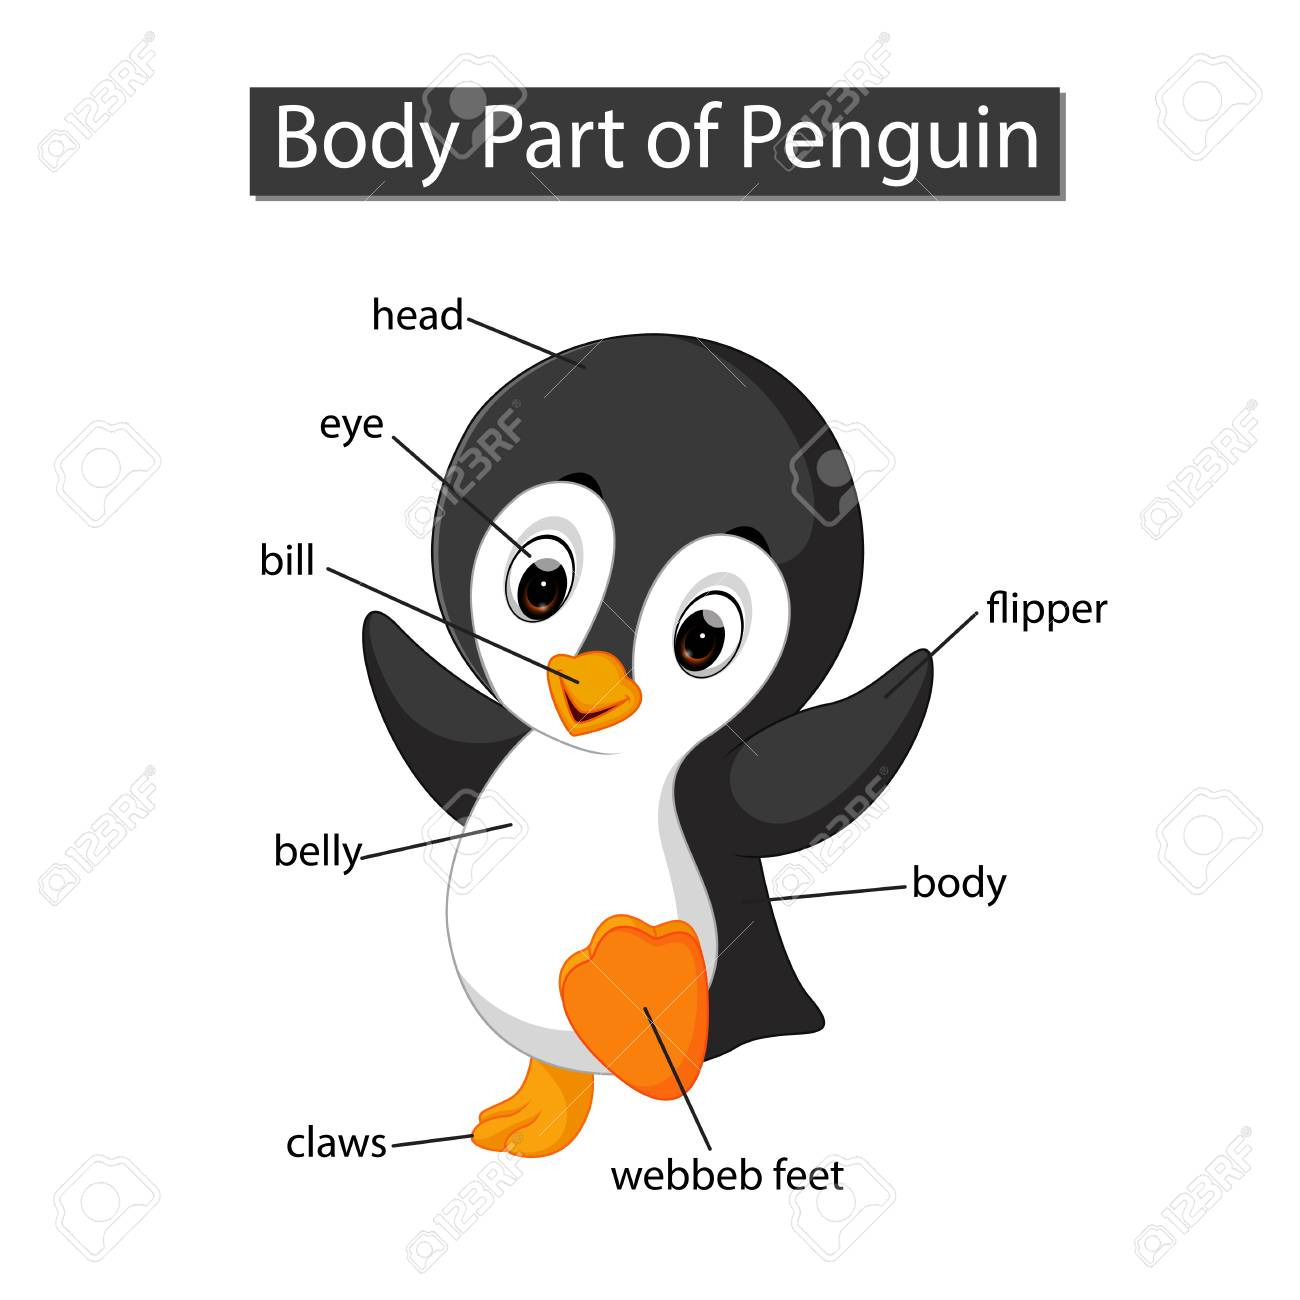

In [11]:
# Getting the description for the categorical variables in the dataset
df.describe(include=['O'])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,146,163,168


In [12]:
# Getting the descriptiuon and measure of center for the Quantitative Variables in the datset
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
# Randomly viewing 10 rows from the dataset
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
140,Adelie,Dream,40.2,17.1,193.0,3400.0,FEMALE
308,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,FEMALE
318,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE
273,Gentoo,Biscoe,50.1,15.0,225.0,5000.0,MALE
40,Adelie,Dream,36.5,18.0,182.0,3150.0,FEMALE
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
204,Chinstrap,Dream,45.7,17.3,193.0,3600.0,FEMALE
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE
259,Gentoo,Biscoe,48.7,15.7,208.0,5350.0,MALE


### *Covariance & Correlation*

> **“Covariance”** indicates the direction of the linear relationship between variables. 

> **“Correlation”** measures both the strength and direction of the linear relationship between two variables.

In [14]:
print("Covariance Table Below:")
df.cov()

Covariance Table Below:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.906333,-2.462091,50.058195,2595.623304
culmen_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


In [15]:
print('Correlation Table Below:')
df.corr()

Correlation Table Below:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


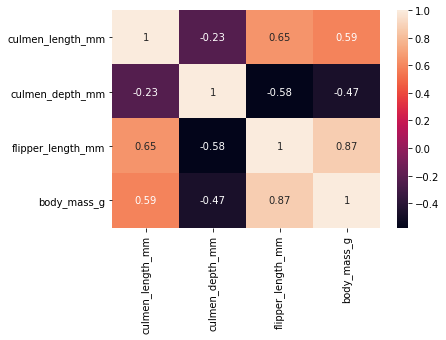

In [16]:
sns.heatmap(df.corr(), annot=True);

#### Observation:

- The culmen_length and depth has no correlation. An increase in either of the varibale does not affect the other variable.


- The flipper_length and body_mass of the penguin have a positive correlation with the culmen_length. As one variable increses the other also increase


- The flipper_length and body_mass of the penguin have a negative correlation with the culmen_depth. As one variable increase, the other however decrease.


- The body mass of the penguin has a strong positive correlation with the flipper length of the penguin. 

### *Plotting a no correlation with the cullen length and cullen depth of the penguin*

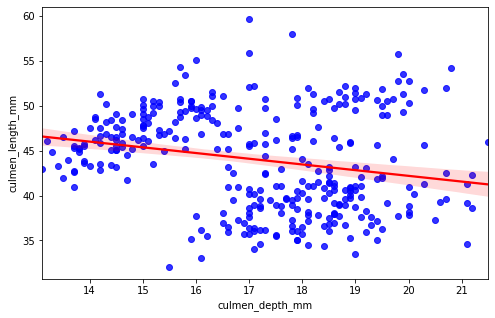

In [17]:
fig = plt.figure(figsize=[8, 5])

sns.regplot(data = df, x = 'culmen_depth_mm', y = 'culmen_length_mm', scatter_kws={"color": "blue"}, line_kws={"color": "red"});

### *Plotting the correlation with the cullen length, flipper_length and body mass of the penguin*

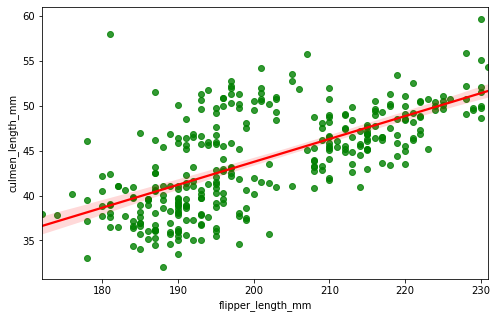

In [18]:
fig = plt.figure(figsize=[8, 5])

sns.regplot(data = df, x = 'flipper_length_mm', y = 'culmen_length_mm', scatter_kws={"color": "green"}, line_kws={"color": "red"});

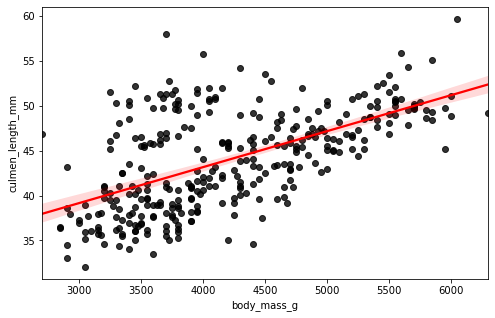

In [19]:
fig = plt.figure(figsize=[8, 5])

sns.regplot(data = df, x = 'body_mass_g', y = 'culmen_length_mm', scatter_kws={"color": "black"}, line_kws={"color": "red"});

### *Plotting the strong positive correlation with the flipper length and body mass of the penguin*

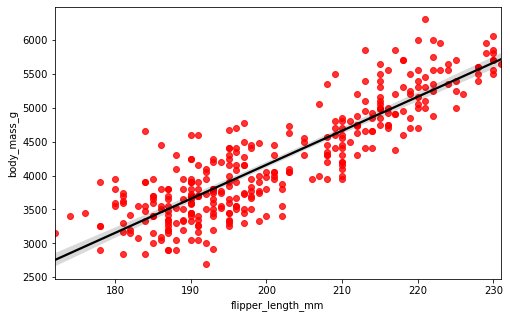

In [20]:
fig = plt.figure(figsize=[8, 5])

sns.regplot(data = df, x = 'flipper_length_mm', y = 'body_mass_g', scatter_kws={"color": "red"}, line_kws={"color": "black"});

### *Creating a new dataframe with the corr attribute to visualize corr relationships from our observation*

In [21]:
corr_df = pd.DataFrame(df, columns = ['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g', 'flipper_length_mm'])

In [22]:
corr_df

,culmen_length_mm,culmen_depth_mm,body_mass_g,flipper_length_mm
0,39.1,18.7,3750.0,181.0
1,39.5,17.4,3800.0,186.0
2,40.3,18.0,3250.0,195.0
4,36.7,19.3,3450.0,193.0
5,39.3,20.6,3650.0,190.0
...,...,...,...,...
338,47.2,13.7,4925.0,214.0
340,46.8,14.3,4850.0,215.0
341,50.4,15.7,5750.0,222.0
342,45.2,14.8,5200.0,212.0


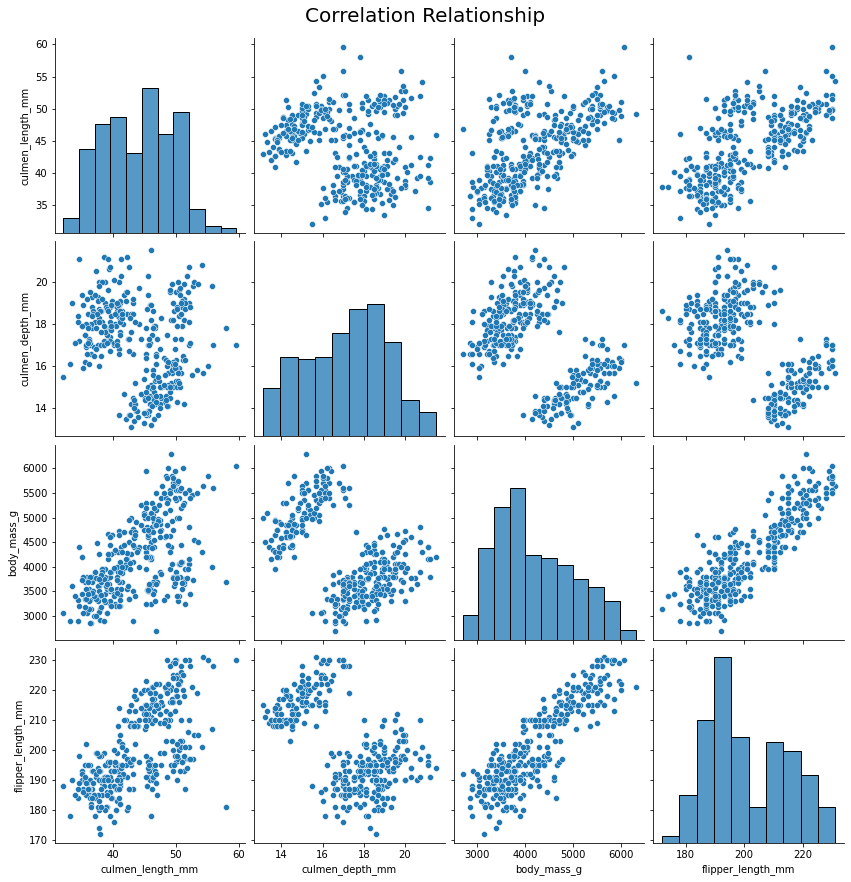

In [23]:
sns.pairplot(corr_df, size=3,diag_kind="hist").fig.suptitle('Correlation Relationship', fontsize=20, y=1.02);

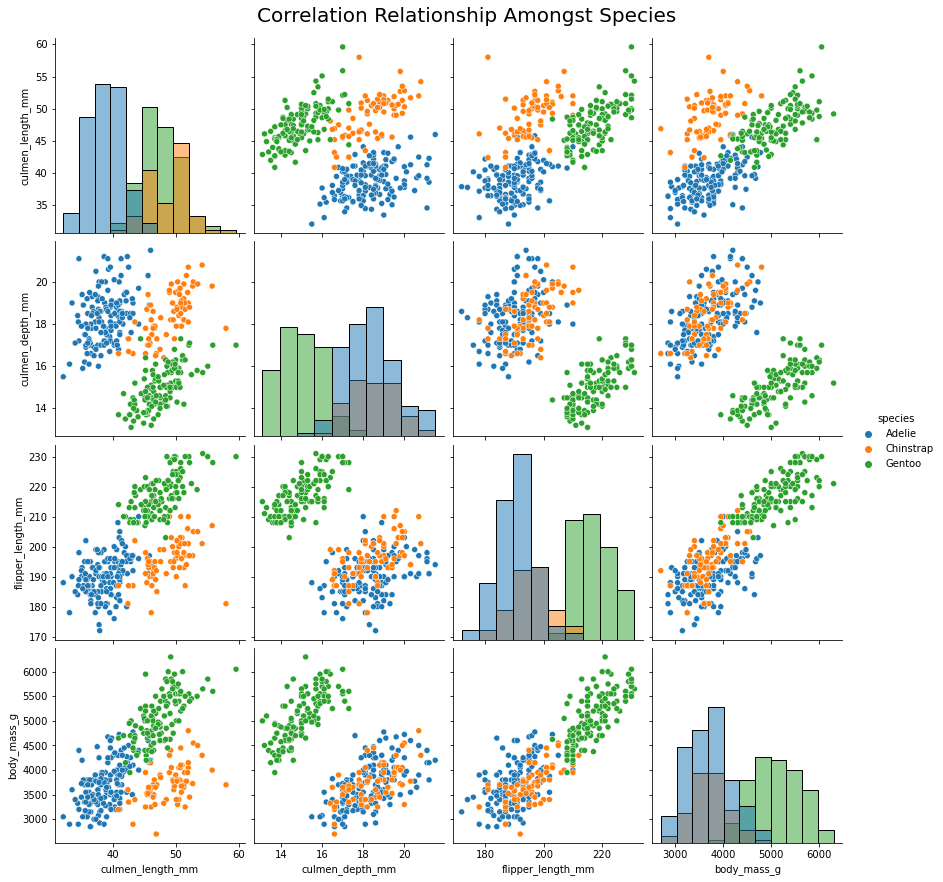

In [24]:
sns.pairplot(df, size=3, hue='species', diag_kind="hist").fig.suptitle('Correlation Relationship Amongst Species', fontsize=20, y=1.02);

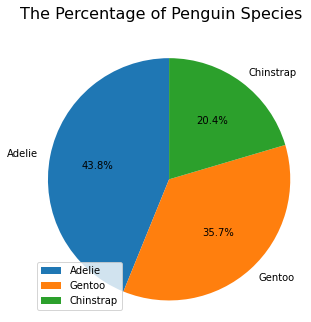

In [25]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('The Percentage of Penguin Species', fontsize=16)

plt.pie(df.species.value_counts(), labels=df.species.value_counts().index, autopct="%.1f%%", startangle=90);
plt.axis('square')
plt.legend(loc='lower left');

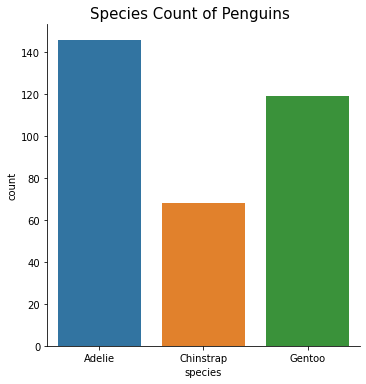

In [26]:
sns.catplot(x='species', data=df, kind='count').fig.suptitle('Species Count of Penguins', fontsize=15, y=1.02);

In [27]:
df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

### Observation:

- It is observed that **Adelie** has the highest number of species with 146 penguins (43.8%), **Gentoo** have 119 penguins (35.7%) and **Chinstrap** have only 68 penguins (20.4%).

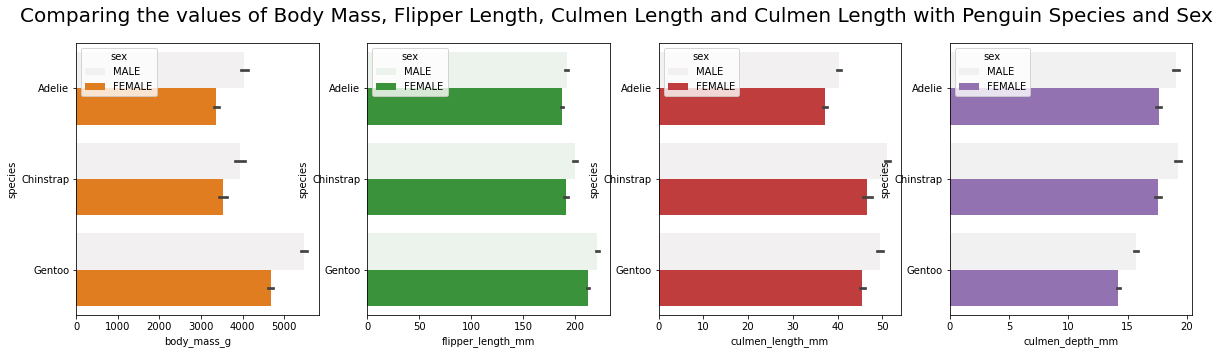

In [28]:
fig = plt.figure(figsize=[20, 5])
fig.suptitle('Comparing the values of Body Mass, Flipper Length, Culmen Length and Culmen Length with Penguin Species and Sex', fontsize=20)

plt.subplot(1, 4, 1)
color_palette = sns.color_palette('bright')[1]
sns.barplot(y='species', x='body_mass_g', data=df, hue='sex', color=color_palette)

plt.subplot(1, 4, 2)
color_palette = sns.color_palette()[2]
sns.barplot(y='species', x='flipper_length_mm', data=df, hue='sex', color=color_palette)

plt.subplot(1, 4, 3)
color_palette = sns.color_palette()[3]
sns.barplot(y='species', x='culmen_length_mm', data=df, hue='sex', color=color_palette)

plt.subplot(1, 4, 4)
color_palette = sns.color_palette()[4]
sns.barplot(y='species', x='culmen_depth_mm', data=df, hue='sex', color=color_palette)

plt.show()

### Observation:

- The Gentoo species has the highest body mass and flipper length.


- The Chinstrap species has the highest cullen length


- The Adelle species has the highest cullen depth


> Note: In all cases the male penguins has a higher body mass, cullen length, flipper length and cullen depth compared to the female penguins.

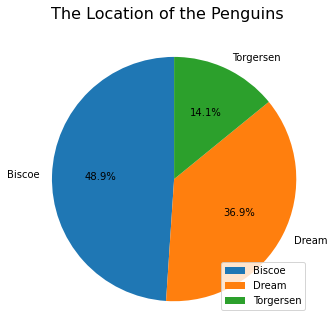

In [29]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('The Location of the Penguins', fontsize=16)

plt.pie(df.island.value_counts(), labels=df.island.value_counts().index, autopct="%.1f%%", startangle=90)
plt.axis('square')
plt.legend(loc='lower right');

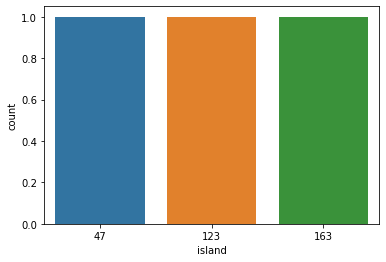

In [30]:
sns.countplot(df.island.value_counts());

### Observation:

- It is observed that Biscoe with 163 penguins, have the highest number of penguins (48.9%) dwelling on the island.


- Dream (36.9%) and Torgersen (14.1%) has 123 and 47 penguins habitating in the island.

### *Visualizing the species distribution for culmen_depth and culmen_length*

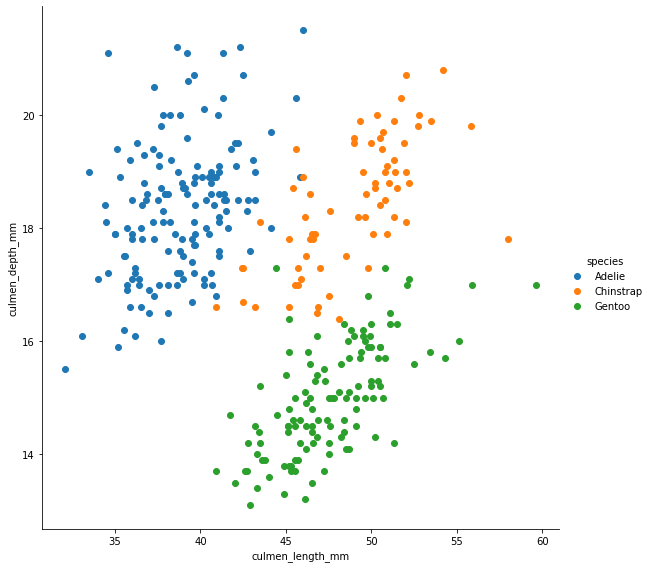

In [31]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend();

### *Visualizing the species distribution for flipper_length and body_mass*

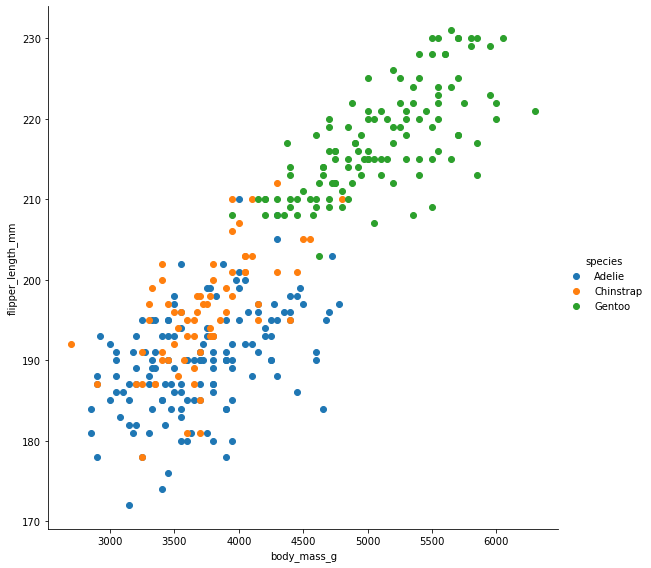

In [32]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend();

### *Visualizing the species distribution for flipper_length and cullen_length*

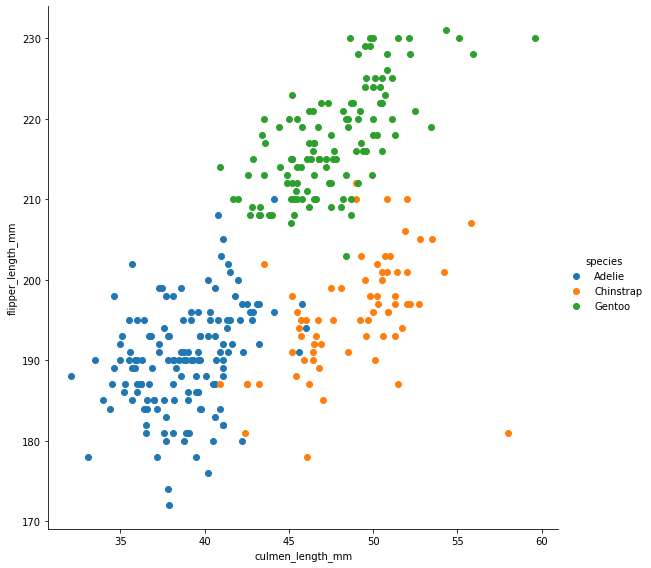

In [33]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend();

### *Flipper length distribution for the penguin species*

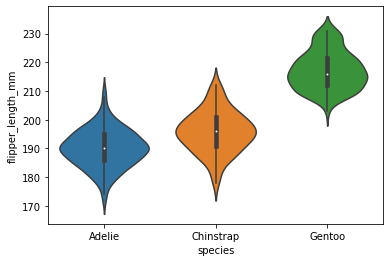

In [34]:
sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8);

### *KDE Plot of species with the flipper length of the penguins*

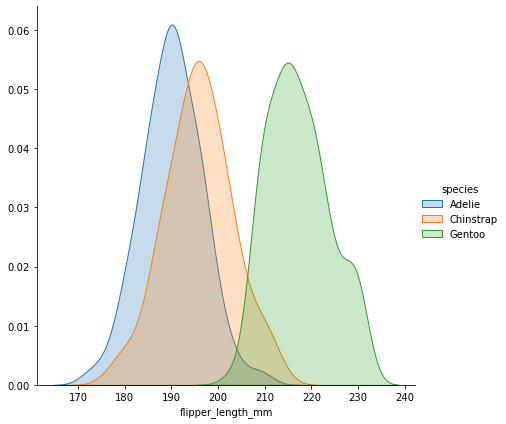

In [35]:
sns.FacetGrid(df, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend();

### *Converting the sex and island columns to quantitative variable using One Hot Encoding*

In [36]:
# Duplicating data set for model prediction
pred_df = df.copy()

In [37]:
pred_df.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,MALE
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,FEMALE
62,Adelie,Biscoe,37.6,17.0,185.0,3600.0,FEMALE


In [38]:
# Selecting just 64 variable of each of the penguin species to aviod error during model fitting
adelie = pred_df[pred_df.species == 'Adelie'].sample(n=68)
gentoo = pred_df[pred_df.species == 'Gentoo'].sample(n=68)
chinstrap = pred_df[pred_df.species == 'Chinstrap'].sample(n=68)

In [39]:
new_df = pd.concat([adelie, gentoo, chinstrap], axis=0)

In [40]:
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
120,Adelie,Torgersen,36.2,17.2,187.0,3150.0,FEMALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
27,Adelie,Biscoe,40.5,17.9,187.0,3200.0,FEMALE


In [41]:
sex_df = pd.get_dummies(new_df.sex)

In [42]:
isl_df = pd.get_dummies(new_df.island)

In [43]:
# binarize the categorical labels for species column
#new_df['species_id'] = new_df['species'].factorize()[0]

### *Dropping the sex and island column from the dataset and then assigning the encoding values to a new concatated dataframe*


In [44]:
new = new_df.drop(columns=['sex', 'island',], axis=1)

In [45]:
clean_df = pd.concat([new, sex_df, isl_df], axis=1)

In [46]:
clean_df.head(10)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
114,Adelie,39.6,20.7,191.0,3900.0,1,0,1,0,0
120,Adelie,36.2,17.2,187.0,3150.0,1,0,0,0,1
6,Adelie,38.9,17.8,181.0,3625.0,1,0,0,0,1
149,Adelie,37.8,18.1,193.0,3750.0,0,1,0,1,0
27,Adelie,40.5,17.9,187.0,3200.0,1,0,1,0,0
95,Adelie,40.8,18.9,208.0,4300.0,0,1,0,1,0
73,Adelie,45.8,18.9,197.0,4150.0,0,1,0,0,1
137,Adelie,40.2,20.1,200.0,3975.0,0,1,0,1,0
148,Adelie,36.0,17.8,195.0,3450.0,1,0,0,1,0
65,Adelie,41.6,18.0,192.0,3950.0,0,1,1,0,0


In [47]:
# import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler

# from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import LassoCV
# from sklearn.linear_model import ElasticNetCV


# import statsmodels.api as sm
# import pingouin as pg


In [48]:
train_df, test_df = train_test_split(clean_df, test_size=0.5, random_state=32)

In [49]:
X_test = test_df.drop(columns='species', axis=1)
y_test = train_df['species']

X_train = test_df.drop(columns='species', axis=1)
y_train = train_df['species']

In [50]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
210,50.2,18.8,202.0,3800.0,0,1,0,1,0
221,50.0,16.3,230.0,5700.0,0,1,1,0,0
296,47.5,14.2,209.0,4600.0,1,0,1,0,0
159,51.3,18.2,197.0,3750.0,0,1,0,1,0
218,50.8,19.0,210.0,4100.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
276,43.8,13.9,208.0,4300.0,1,0,1,0,0
64,36.4,17.1,184.0,2850.0,1,0,1,0,0
343,49.9,16.1,213.0,5400.0,0,1,1,0,0
338,47.2,13.7,214.0,4925.0,1,0,1,0,0


In [51]:
# binarize our categorical labels for species
clean_df['spec_id'] = clean_df['species'].factorize()[0]

# setting up the assosicated dictionary for later usage with heat maps and confusion matrix
spec_id_df = clean_df[['species', 'spec_id']].drop_duplicates().sort_values('spec_id')


In [52]:
model_NB = MultinomialNB()

In [53]:
model_NB.fit(X_train, y_train)

MultinomialNB()

In [54]:
model_pred = model_NB.predict(X_test)

### *Computing the accuracy of the Confusion Matrix for the Multinomial NB Model then and plotting it using heatmap.*

In [55]:
nb_accuracy = confusion_matrix(y_test, model_pred)
print('The Accuracy of Multinomial NB Model: \n', nb_accuracy)

The Accuracy of Multinomial NB Model: 
 [[ 9 11  8]
 [12 14 12]
 [ 7 11 18]]


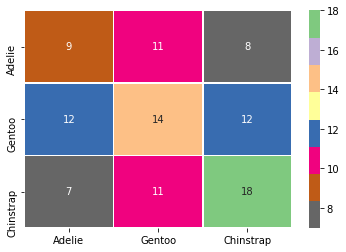

In [56]:
sns.heatmap(nb_accuracy, cmap='Accent_r', annot=True, linewidths=0.5,
           xticklabels=spec_id_df['species'].values,
           yticklabels=spec_id_df['species'].values);

### *Getting the accuracy score of the Multinomial NB Model*

In [57]:
score = accuracy_score(y_test, model_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.4019607843137255


### *Computing the Classification Report  for the Multinomial NB Model*

In [58]:
matrix = classification_report(y_test, model_pred)
print('Classification Report for the Naibe Bayes Model: \n', matrix)

Classification Report for the Naibe Bayes Model: 
               precision    recall  f1-score   support

      Adelie       0.32      0.32      0.32        28
   Chinstrap       0.39      0.37      0.38        38
      Gentoo       0.47      0.50      0.49        36

    accuracy                           0.40       102
   macro avg       0.39      0.40      0.40       102
weighted avg       0.40      0.40      0.40       102



### *Making a predictive model using Logistic Regression*

In [59]:
model_log = LogisticRegression(multi_class='multinomial', max_iter=10000)

In [60]:
model_log.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [61]:
log_pred = model_log.predict(X_test)

### *Computing the accuracy of the confusion matrix for the Logistic Regression Model then and plotting it using heatmap.*

In [62]:
log_accuracy = confusion_matrix(y_test, log_pred)
print('The Accuracy of Logistic Regression Model: \n', log_accuracy)

The Accuracy of Logistic Regression Model: 
 [[10 12  6]
 [ 5 18 15]
 [ 5  9 22]]


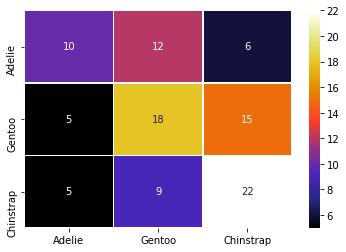

In [63]:
sns.heatmap(log_accuracy, cmap='CMRmap', annot=True, linewidths=0.5,
           xticklabels=spec_id_df['species'].values,
           yticklabels=spec_id_df['species'].values);

### *Getting the accuracy score of the Logistic Regression Model*

In [64]:
log_score = accuracy_score(y_test, log_pred)
print('The Accuracy Score is', log_score)

The Accuracy Score is 0.49019607843137253


### *Computing the Classification Report  for the Logistic Regression Model*

In [65]:
log_matrix = classification_report(y_test, log_pred)
print('Classification Report for the Logistic Regression Model: \n', log_matrix)

Classification Report for the Logistic Regression Model: 
               precision    recall  f1-score   support

      Adelie       0.50      0.36      0.42        28
   Chinstrap       0.46      0.47      0.47        38
      Gentoo       0.51      0.61      0.56        36

    accuracy                           0.49       102
   macro avg       0.49      0.48      0.48       102
weighted avg       0.49      0.49      0.49       102



### *Making a Predictive Model using K-Nearest Neighbors Algorithm*

In [66]:
model_kn = KNeighborsClassifier()

In [67]:
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
kn_pred = model_kn.predict(X_test)

### *Computing the accuracy of the Confusion Matrix for the KN Neighbors Model then and plotting it using HeatMap*

In [69]:
kn_accuracy = confusion_matrix(y_test, kn_pred)
print('The Accuracy of  KN Neighbors Model: \n', kn_accuracy)

The Accuracy of  KN Neighbors Model: 
 [[14 14  0]
 [ 7 27  4]
 [ 8 14 14]]


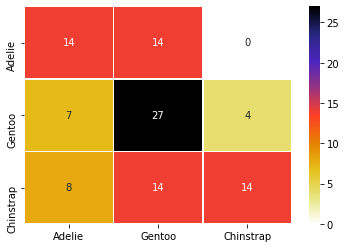

In [70]:
sns.heatmap(kn_accuracy, cmap='CMRmap_r', annot=True, linewidths=0.5,
           xticklabels=spec_id_df['species'].values,
           yticklabels=spec_id_df['species'].values);

### *Getting the accuracy score of the KN Neighbors Model*

In [71]:
kn_score = accuracy_score(y_test, kn_pred)
print('The Accuracy Score is', kn_score)

The Accuracy Score is 0.5392156862745098


### *Computing the Classification Report  for the KN Neighbors Model*

In [72]:
kn_matrix = classification_report(y_test, kn_pred)
print('Classification Report for the KN Neighbors Model: \n', kn_matrix)

Classification Report for the KN Neighbors Model: 
               precision    recall  f1-score   support

      Adelie       0.48      0.50      0.49        28
   Chinstrap       0.49      0.71      0.58        38
      Gentoo       0.78      0.39      0.52        36

    accuracy                           0.54       102
   macro avg       0.58      0.53      0.53       102
weighted avg       0.59      0.54      0.53       102



### *Making a Predictive Model using Support Vector Classification (SVC)*

In [73]:
model_svc = SVC()

In [74]:
model_svc.fit(X_train, y_train)

SVC()

In [75]:
svc_pred = model_svc.predict(X_test)

### *Computing the accuracy of the Confusion Matrix for the SVC Model then and plotting it using a HeatMap*

In [76]:
svc_accuracy = confusion_matrix(y_test, svc_pred)
print('The Accuracy of  SVC Model: \n', svc_accuracy)

The Accuracy of  SVC Model: 
 [[ 0 28  0]
 [ 0 38  0]
 [ 0 36  0]]


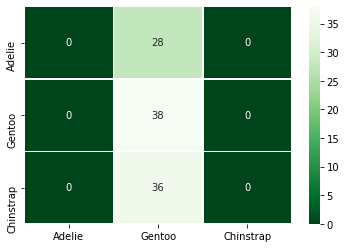

In [77]:
sns.heatmap(svc_accuracy, cmap='Greens_r', annot=True, linewidths=0.5,
           xticklabels=spec_id_df['species'].values,
           yticklabels=spec_id_df['species'].values);

### *Getting the accuracy score of the SVC Model*

In [78]:
svc_score = accuracy_score(y_test, svc_pred)
print('The Accuracy Score is', svc_score)

The Accuracy Score is 0.37254901960784315


### *Computing the Classification Report  for the SVC Model*

In [79]:
svc_matrix = classification_report(y_test, svc_pred)
print('Classification Report for the KN Neighbors Model: \n', svc_matrix)

Classification Report for the KN Neighbors Model: 
               precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00        28
   Chinstrap       0.37      1.00      0.54        38
      Gentoo       0.00      0.00      0.00        36

    accuracy                           0.37       102
   macro avg       0.12      0.33      0.18       102
weighted avg       0.14      0.37      0.20       102



### *Making a Predictive Model using Random Forest Classifier*

In [80]:
model_rfc = RandomForestClassifier()

In [81]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
rfc_pred = model_rfc.predict(X_test)

### *Computing the accuracy of the Confusion Matrix for the Random Forest Classifier Model then and plotting it using a HeatMap*

In [83]:
rfc_accuracy = confusion_matrix(y_test, rfc_pred)
print('The Accuracy of the Random Forest Classifier Model: \n', rfc_accuracy)

The Accuracy of the Random Forest Classifier Model: 
 [[28  0  0]
 [ 0 38  0]
 [ 0  0 36]]


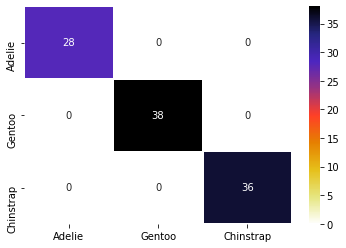

In [84]:
sns.heatmap(rfc_accuracy, cmap='CMRmap_r', annot=True, linewidths=0.5,
           xticklabels=spec_id_df['species'].values,
           yticklabels=spec_id_df['species'].values);

### *Getting the accuracy score of the Random Forest Classifier Model*

In [85]:
rfc_score = accuracy_score(y_test, rfc_pred)
print('The Accuracy Score is', rfc_score)

The Accuracy Score is 1.0


### *Computing the Classification Report  for the Random Forest Classifier Model*

In [86]:
rfc_matrix = classification_report(y_test, rfc_pred)
print('Classification Report for the KN Neighbors Model: \n', rfc_matrix)

Classification Report for the KN Neighbors Model: 
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        28
   Chinstrap       1.00      1.00      1.00        38
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



### *Comparing all Classification Models*

In [87]:
# Renaming things for clearer understanding
features = X_train.copy()
targets = y_train.copy()

#defining models we are working with
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression(multi_class='multinomial', max_iter=10000),
    RandomForestClassifier()
]

# number of cross validation; 5 is standard... 10 is max
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

# Outer for loop to execute our cross validation on the above model
for model in models:
    
    # accessing model information class
    model_name = model.__class__.__name__
    
    #get the model to calculate R2 (accuracy)
    accuracies = cross_val_score(model, features, targets, scoring='accuracy', cv=CV)
    
    #inner for loop to fill in the entries
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

# finalizing dataframe
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


In [88]:
cv_df

,model_name,fold_idx,accuracy
0,MultinomialNB,0,0.380952
1,MultinomialNB,1,0.238095
2,MultinomialNB,2,0.300000
3,MultinomialNB,3,0.250000
4,MultinomialNB,4,0.500000
5,SVC,0,0.380952
6,SVC,1,0.380952
7,SVC,2,0.250000
8,SVC,3,0.350000
9,SVC,4,0.350000


### *Plotting the result of all the classification models*

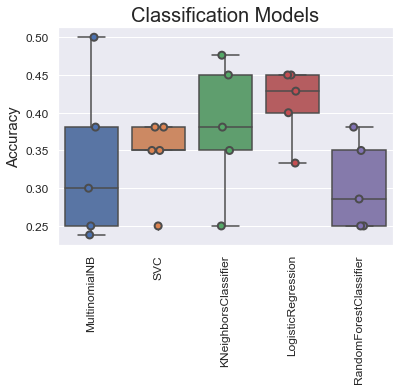

In [89]:
sns.set(color_codes=True)
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name',y='accuracy', data=cv_df, size=7, jitter=True, edgecolor='gray', linewidth=2)

plt.title("Classification Models", fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0);

### *Looking at the average accuracy squared*

In [90]:
final_comp = cv_df.groupby('model_name').accuracy.mean().reset_index().sort_values(by='accuracy', ascending=False)

In [91]:
final_comp

,model_name,accuracy
1,LogisticRegression,0.412381
0,KNeighborsClassifier,0.381429
4,SVC,0.342381
2,MultinomialNB,0.333810
3,RandomForestClassifier,0.303333


### *Model hyper tunning and optimization for the Random Forest Classifier Model*

In [92]:
regressor = RandomForestClassifier()

In [93]:
grid = {

    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
#     "alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     "fit_prior": ["True", "False"]
}

In [94]:
grid_apply = GridSearchCV(regressor, param_grid=grid, scoring = "accuracy", cv = 5, refit = True, verbose=2)

In [95]:
grid_apply.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_features=auto, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. max_features=auto, n_estimators=200, total=   0.5s
[CV] max_features=auto, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............. max_features=auto, n_estimators=200, total=   0.4s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=   0.5s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=   0.4s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=   0.4s
[CV] max_features=auto, n_estimators=700 .............................
[CV] .............. max_features=auto, n_estimators=700, total=   1.4s
[CV] max_features=auto, n_estimators=700 .............................
[CV] .............. max_features=auto, n_estimators=700, total=   1.6s
[CV] max_features=auto, n_estimators=700 .............................
[CV] .............. max_features=auto, n_estimators=700, total=   1.6s
[CV] max_features=auto, n_estimators=700 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.5s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             scoring='accuracy', verbose=2)

In [96]:
best_perf = grid_apply.best_score_

best_model = grid_apply.best_estimator_

In [97]:
print('Best Accuracy =', best_perf)
print('')
print('Best Model Params', best_model)

Best Accuracy = 0.38190476190476186

Best Model Params RandomForestClassifier(max_features='sqrt', n_estimators=700)


### *Model hyper tunning and optimization for the Multinomial NB Model*

In [98]:
regressor_NB = MultinomialNB()

In [99]:
grid = {
    "alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "fit_prior": ["True", "False"]
}

In [100]:
grid_apply = GridSearchCV(regressor_NB, grid, scoring = "accuracy", cv = 5, refit = True, verbose=2)

In [101]:
grid_apply.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........................ alpha=0.1, fit_prior=True, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........................ alpha=0.1, fit_prior=True, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........................ alpha=0.1, fit_prior=True, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........................ alpha=0.1, fit_prior=True, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........................ alpha=0.1, fit_prior=True, total=   0.0s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] ....................... alpha=0.1, fit_prior=False, total=   0.0s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... alpha=0.2, fit_prior=False, total=   0.0s
[CV] alpha=0.3, fit_prior=True .......................................
[CV] ........................ alpha=0.3, fit_prior=True, total=   0.0s
[CV] alpha=0.3, fit_prior=True .......................................
[CV] ........................ alpha=0.3, fit_prior=True, total=   0.0s
[CV] alpha=0.3, fit_prior=True .......................................
[CV] ........................ alpha=0.3, fit_prior=True, total=   0.0s
[CV] alpha=0.3, fit_prior=True .......................................
[CV] ........................ alpha=0.3, fit_prior=True, total=   0.0s
[CV] alpha=0.3, fit_prior=True .......................................
[CV] ........................ alpha=0.3, fit_prior=True, total=   0.0s
[CV] alpha=0.3, fit_prior=False ......................................
[CV] ....................... alpha=0.3, fit_prior=False, total=   0.0s
[CV] alpha=0.3, fit_prior=False ......................................
[CV] .

[CV] ....................... alpha=0.9, fit_prior=False, total=   0.0s
[CV] alpha=0.9, fit_prior=False ......................................
[CV] ....................... alpha=0.9, fit_prior=False, total=   0.0s
[CV] alpha=0.9, fit_prior=False ......................................
[CV] ....................... alpha=0.9, fit_prior=False, total=   0.0s
[CV] alpha=0.9, fit_prior=False ......................................
[CV] ....................... alpha=0.9, fit_prior=False, total=   0.0s
[CV] alpha=0.9, fit_prior=False ......................................
[CV] ....................... alpha=0.9, fit_prior=False, total=   0.0s
[CV] alpha=1.0, fit_prior=True .......................................
[CV] ........................ alpha=1.0, fit_prior=True, total=   0.0s
[CV] alpha=1.0, fit_prior=True .......................................
[CV] ........................ alpha=1.0, fit_prior=True, total=   0.0s
[CV] alpha=1.0, fit_prior=True .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'fit_prior': ['True', 'False']},
             scoring='accuracy', verbose=2)

In [102]:
best_perf = grid_apply.best_score_

best_model = grid_apply.best_estimator_

In [103]:
print('Best Accuracy =', best_perf)
print('')
print('Best Model Params', best_model)

Best Accuracy = 0.33380952380952383

Best Model Params MultinomialNB(alpha=0.5, fit_prior='True')
